In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


[((13, 13), (12, 13)),
 ((12, 13), (12, 12)),
 ((12, 12), (11, 12)),
 ((11, 12), (10, 12)),
 ((10, 12), (9, 12)),
 ((9, 12), (8, 12)),
 ((8, 12), (7, 12)),
 ((7, 12), (6, 12)),
 ((6, 12), (5, 12)),
 ((5, 12), (4, 12)),
 ((4, 12), (4, 11)),
 ((4, 11), (4, 10)),
 ((4, 10), (3, 10)),
 ((3, 10), (3, 9))]

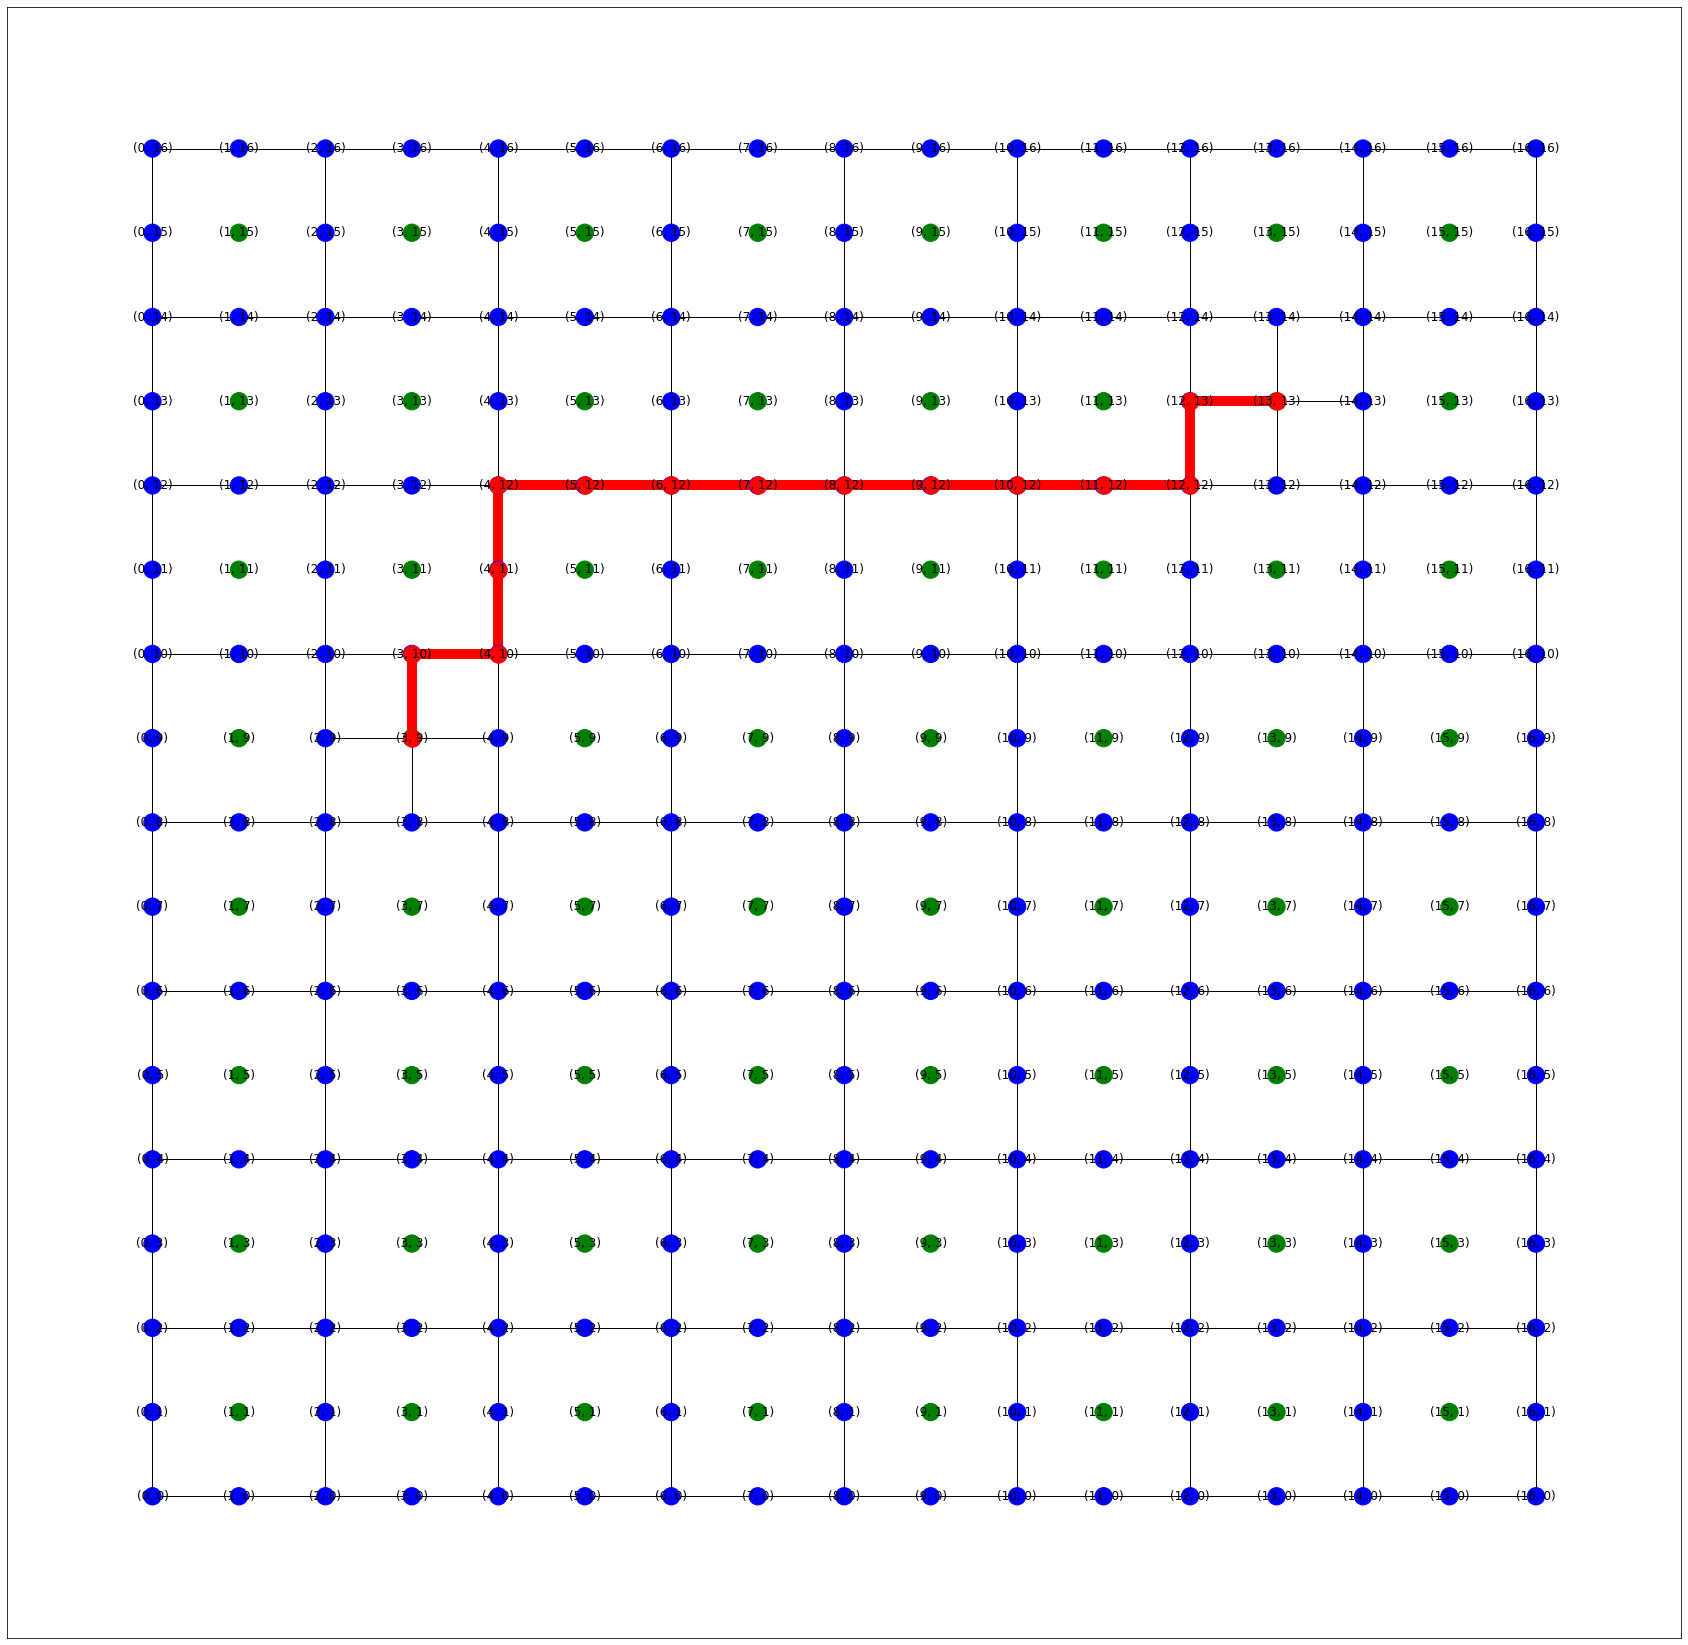

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

N=17
def get_id(coor):
    return coor[0]*N+coor[1]

def draw_graph(G):
    plt.rcParams["figure.figsize"] = (30,30)
    pos = dict( (n, n) for n in G.nodes() )
    #labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
    color_map =  [('green' if (i%2 == 1 and j % 2 == 1) else 'blue') for i,j in G.nodes()]
    #color_map[get_id(source)] = 'red'
    #color_map[get_id(sink)] = 'yellow'
    nx.draw_networkx(G, pos=pos, node_color = color_map)

    
def draw_shortest_path(G, path, path_edges):
    pos = dict( (n, n) for n in G.nodes() )
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
    
def remove_connecting_edges(G):
    for x in range(1,N, 2):
        for y in range(1,N,2):
            for i in range(-1,2):
                for j in range (-1,2):
                    u = (x,y)
                    v = (x+i,y+j)
                    if(x+i >=0 and y+j >=0 and G.has_edge(u,v)):
                        G.remove_edge(u,v)

def add_connecting_edges(G, u):
    for i in range(-1, 2):
        for j in range(-1,2):
            x = u[0]
            y = u[1]
            v= (x+i,y+j)
            if(x+i>=0 and y+j >=0 and x+i < N and y+j < N and u != v and( (x+i == x) or (y+j == y) )):
                G.add_edge(u,v)

def get_coordinates_from_move(move):
    source = (ord(move[0])-ord('a')+1, ord(move[1])-ord('0'))
    source = (source[0]*2 - 1,source[1]*2-1)
    sink = (ord(move[2])-ord('a')+1, ord(move[3])-ord('0'))
    sink = (sink[0]*2 - 1,sink[1]*2-1)
    return (source, sink)

def get_path(move):
    G=nx.grid_2d_graph(N,N)

    (source,sink) = get_coordinates_from_move(move)
    
    H = G.copy()

    remove_connecting_edges(H)
    add_connecting_edges(H, source)
    add_connecting_edges(H, sink)

    path = nx.shortest_path(H,source=source, target=sink, method='dijkstra')
    path_edges = list(zip(path,path[1:]))

    draw_graph(H)
    draw_shortest_path(H,path,path_edges)
    return path_edges
    

def simplify_path(path):
    res=[]
    prev_dir = (path[0][1][0]-path[0][0][0], path[0][1][1]-path[0][0][1])
    start = path[0][0]
    end = path[0][1]
    i = 1
    while i < len(path):
        
        curr_dir = (path[i][1][0]-path[i][0][0], path[i][1][1]-path[i][0][1])
        
        if(curr_dir == prev_dir):
            end = path[i][1]
        else: 
            res.append((start,end))
            start = path[i][0]
            end = path[i][1]
        i +=1
        prev_dir = curr_dir
    #add the path of the last cell
    res.append((start,end))
    return res


(get_path("g7b5"))

In [16]:
"""path = [((1, 1), (2, 2)),
 ((2, 2), (3, 2)),
 ((3, 2), (4, 2)),
 ((4, 2), (5, 2)),
 ((5, 2), (6, 2)),
 ((6, 2), (7, 2)),
 ((7, 2), (8, 2)),
 ((8, 2), (9, 2)),
 ((9, 2), (10, 2)),
 ((10, 2), (11, 2)),
 ((11, 2), (12, 2)),
 ((12, 2), (13, 2)),
 ((13, 2), (14, 2)),
 ((14, 2), (14, 3)),
 ((14, 3), (14, 4)),
 ((14, 4), (14, 5)),
 ((14, 5), (14, 6)),
 ((14, 6), (14, 7)),
 ((14, 7), (14, 8)),
 ((14, 8), (14, 9)),
 ((14, 9), (14, 10)),
 ((14, 10), (14, 11)),
 ((14, 11), (14, 12)),
 ((14, 12), (14, 13)),
 ((14, 13), (14, 14)),
 ((14, 14), (15, 15)),
 ((15, 15), (16, 16)),
 ((16, 16), (16, 15)),
 ((16, 15),(16, 14))] 
simplify_path(path)"""


'path = [((1, 1), (2, 2)),\n ((2, 2), (3, 2)),\n ((3, 2), (4, 2)),\n ((4, 2), (5, 2)),\n ((5, 2), (6, 2)),\n ((6, 2), (7, 2)),\n ((7, 2), (8, 2)),\n ((8, 2), (9, 2)),\n ((9, 2), (10, 2)),\n ((10, 2), (11, 2)),\n ((11, 2), (12, 2)),\n ((12, 2), (13, 2)),\n ((13, 2), (14, 2)),\n ((14, 2), (14, 3)),\n ((14, 3), (14, 4)),\n ((14, 4), (14, 5)),\n ((14, 5), (14, 6)),\n ((14, 6), (14, 7)),\n ((14, 7), (14, 8)),\n ((14, 8), (14, 9)),\n ((14, 9), (14, 10)),\n ((14, 10), (14, 11)),\n ((14, 11), (14, 12)),\n ((14, 12), (14, 13)),\n ((14, 13), (14, 14)),\n ((14, 14), (15, 15)),\n ((15, 15), (16, 16)),\n ((16, 16), (16, 15)),\n ((16, 15),(16, 14))] \nsimplify_path(path)'